In [16]:
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.data.shape

(1797, 64)

In [7]:
dataset = digits.data[0].reshape(8,8)
dataset[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

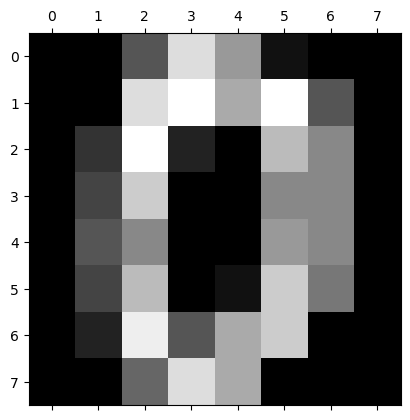

In [11]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [12]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
x = df
y = digits.target

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.1)

In [25]:
mdl = LogisticRegression()
mdl.fit(x_scaled,y)

LogisticRegression()

In [26]:
mdl.score(x_test,y_test)

0.9944444444444445

In [37]:
from sklearn.decomposition import PCA 
p = PCA(0.90)
f = p.fit_transform(x)
f.shape

(1797, 21)

In [34]:
p.explained_variance_ratio_

array([0.12122169, 0.09715016, 0.08346854, 0.06455173, 0.05071108,
       0.04062997, 0.04012429, 0.03461746, 0.03139669, 0.0300995 ,
       0.02802087, 0.02396147, 0.02290661, 0.02163541, 0.02111555,
       0.02002646, 0.01853987, 0.01719689, 0.01624852, 0.01428541,
       0.01371325, 0.01237341, 0.01148184, 0.01078634, 0.00965112,
       0.00939369, 0.00848157, 0.00820261, 0.00787508, 0.00753859,
       0.00730953])

In [35]:
p.n_components_

31

In [38]:
x_train,x_test,y_train,y_test = train_test_split(f,y,test_size=0.15)

In [39]:
mdl2 = LogisticRegression()
mdl2.fit(x_train,y_train)
mdl2.score(x_test,y_test)

C:\Users\Praveen reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593